<a href="https://colab.research.google.com/github/tianhanl0/38610/blob/main/CI_FAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each
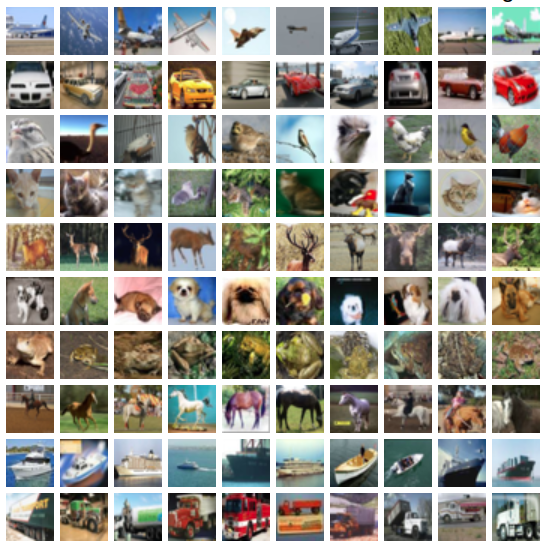

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

# Reference
* [Learning Multiple Layers of Features from Tiny Images](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf), Alex Krizhevsky, 2009.

## Install packages

In [6]:
!pip install halcon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import libraries

In [7]:
import urllib3
import shutil
from numpy import genfromtxt
from pathlib import Path
from os import remove
from halcon import search
from time import time
from tabulate import tabulate
import requests
from tqdm import tqdm
import tarfile
import pickle
from os import unlink

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.xda-developers.com%2Ffiles%2F2017%2F05%2Fstack-overflow.png&f=1&nofb=1" width="35%" /><br>
The helper function below was adapted from an answer in StackOverFlow.
* https://stackoverflow.com/questions/15644964/python-progress-bar-and-downloads

In [8]:
def download(url, filename):
    '''
    Helper function to download files
    '''
    resp = requests.get(url, stream=True)
    total = int(resp.headers.get('content-length', 0))
    with open(filename, 'wb') as file, tqdm(
        desc=filename,
        total=total,
        unit='iB',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in resp.iter_content(chunk_size=1024):
            size = file.write(data)
            bar.update(size)

In [9]:
def unpickle(file):
    '''
    Helper function from 
    https://www.cs.toronto.edu/~kriz/cifar.html
    '''
    
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

## Download and load data

In [10]:
url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
filename = 'cifar-10-python.tar.gz'

download(url, filename)
tar = tarfile.open(filename)
tar.extractall()
tar.close()
unlink(filename)

cifar-10-python.tar.gz: 100%|██████████| 163M/163M [00:05<00:00, 31.6MiB/s]


In [11]:
dict = {}
path = Path('cifar-10-batches-py').glob('data_batch*')
for file in path:
  temp = unpickle(file)
  dict.update(temp)

In [12]:
dict.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [14]:
dict[b'data']

array([[178, 178, 178, ...,  80,  80,  77],
       [ 29,  22,  25, ...,  29,  31,  30],
       [ 36,  33,  21, ..., 173, 170, 170],
       ...,
       [167, 164, 151, ..., 132, 142, 130],
       [ 45,  46,  46, ...,  30,  34,  24],
       [235, 239, 239, ..., 182, 175, 174]], dtype=uint8)